## 支持向量回归（SVR）

支持向量回归器的均方误差: 0.0015


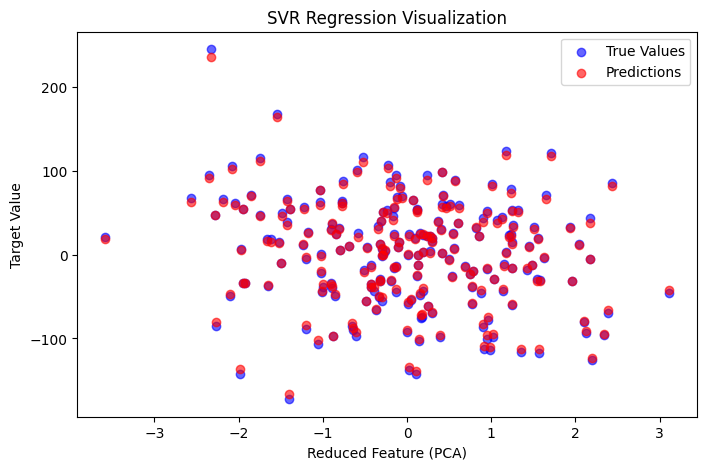

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 生成示例回归数据集
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=0.1, random_state=42)

# 数据标准化（SVR 对数据范围敏感）
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 创建 SVR 模型（调整超参数）
svr_regressor = SVR(kernel='linear', C=100, gamma=0.1)

# 训练模型
svr_regressor.fit(X_train, y_train)

# 预测
y_pred = svr_regressor.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"支持向量回归器的均方误差: {mse:.4f}")

# 使用 PCA 降维到 1 维，便于可视化
pca = PCA(n_components=1)
X_test_pca = pca.fit_transform(X_test)

# 还原 y_pred 到原尺度
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 绘制回归结果
plt.figure(figsize=(8, 5))
plt.scatter(X_test_pca, y_test_original, color="blue", label="True Values", alpha=0.6)
plt.scatter(X_test_pca, y_pred_original, color="red", label="Predictions", alpha=0.6)
plt.xlabel("Reduced Feature (PCA)")
plt.ylabel("Target Value")
plt.title("SVR Regression Visualization")
plt.legend()
plt.show()


## kenel + Ridge 回归

核岭回归的均方误差: 102.7524


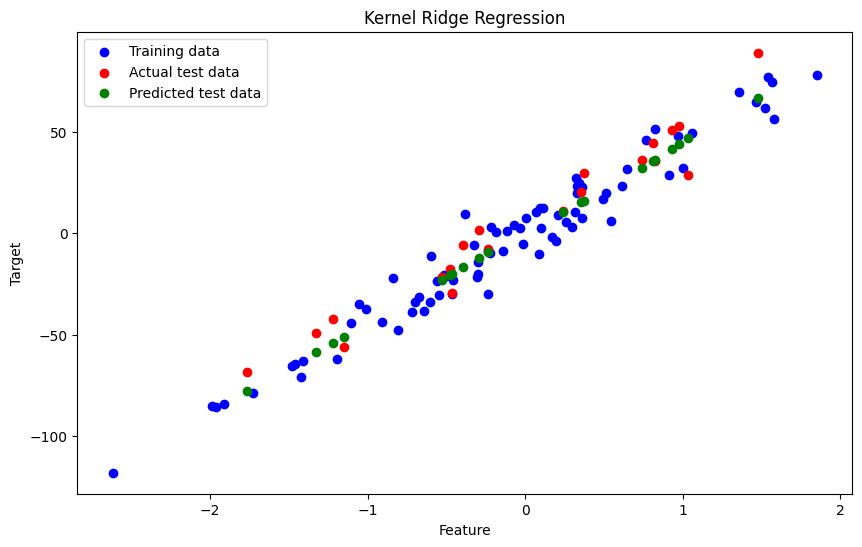

In [7]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. 生成示例回归数据集
# 使用 make_regression 函数生成包含 100 个样本、1 个特征的回归数据集，添加一定噪声
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 2. 划分训练集和测试集
# 将数据集按 80:20 的比例划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 创建核岭回归模型
# 使用径向基核函数（RBF），设置正则化参数 alpha 为 0.1
krr = KernelRidge(kernel='rbf', alpha=0.1)

# 4. 训练模型
krr.fit(X_train, y_train)

# 5. 在测试集上进行预测
y_pred = krr.predict(X_test)

# 6. 计算评估指标
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"核岭回归的均方误差: {mse:.4f}")

# 7. 可视化结果
plt.figure(figsize=(10, 6))
# 绘制训练数据点
plt.scatter(X_train, y_train, c='b', label='Training data')
# 绘制测试数据点和预测结果
plt.scatter(X_test, y_test, c='r', label='Actual test data')
plt.scatter(X_test, y_pred, c='g', label='Predicted test data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Kernel Ridge Regression')
plt.legend()
plt.show()